<a href="https://colab.research.google.com/github/nabilanewaz/NM/blob/main/Newton_Raphson_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# **Newton-Raphson method**
The Newton-Raphson method is a method of finding roots of a nonlinear function. Unlike the Bisection method, it falls under the category of **Open methods** due to the fact that we only need one initial guess that does not have to bracket the actual root.

In today's lab, we will be implementing the Newton-Raphson method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3+x-2$, then in python we will create an array as follows:

In [ ]:
f = [1, 0, 1, -2]
# g = [1, 2, 0, -2]
# x_init = -2

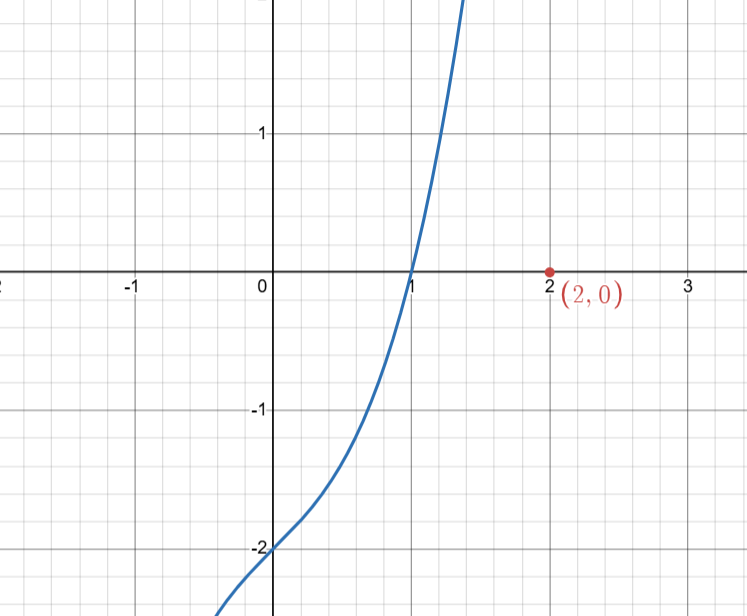

Note that your implementation should be able to handle the array `f` of any size, which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array `f` given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array `f` and a point `x` as input and evaluate the value of the function at that point x using a loop and return that value.

This function will be called in the other function that you will implement, which is as follows:
```
newtonraphson(f, x_init, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute Relative Approximate Error $|\epsilon_a|$ of at most `epsilon` $(\%)$. Note that, here epsilon is the prespecified Relative Error Tolerance $\epsilon_s$.

You will also need a function to calculate the derivative $f'(x)$ at some value of $x$.
```
derivative(f, x)
```

## Task 1: The Function

In [ ]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    val = 0.0
    degree = len(f) - 1
    for i, coef in enumerate(f):
        val += coef * x**(degree - i)
    return val


In [ ]:
print(func(f,2))
print(func(f,3))
print(func(f,5))

8.0
28.0
128.0


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$8
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$128

## Task 2: The Derivative of the Function

In [ ]:
# Write a function for evaluating the derivative of the polynomial given by array f
def derivative(f, x):
    val = 0.0
    degree = len(f) - 1
    for i, coef in enumerate(f[:-1]):
        power = degree - i
        val += power * coef * x**(power - 1)

    return val

In [ ]:
print(derivative(f,2))
print(derivative(f,3))
print(derivative(f,5))

13.0
28.0
76.0


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$13
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$76

## Task 3: The Algorithm
Now, its time to implement the whole algorithm. Take the initial guess as $2$, the Relative Error Tolerance $\epsilon_s$ as $0.01$, and the maximum number of iterations as $10000$.

In [ ]:
x_init = 2
epsilon = 0.01
MAX_ITERS=10000

# Complete the following function
def newtonraphson(f, x_init, epsilon, iterations = MAX_ITERS):
        x_current = x_init
        x_values = [x_current]


        for iteration in range(1, iterations + 1):
              f_val = func(f, x_current)
              f_derivative = derivative(f, x_current)
        if f_derivative == 0:
            raise ZeroDivisionError("choose a different x_init.")
        x_next = x_current - f_val / f_derivative

        # Relative approximate error
        err = abs((x_next - x_current) / x_next) * 100
        if err <= epsilon:
            return x_next

        x_current = x_next


        return x_next



In [ ]:
# Test your function here
print(newtonraphson(f, x_init, epsilon))

1.3846153846153846


The value should be very very close to $1$. (*e.g.* $1.0000170707310327$)<br>
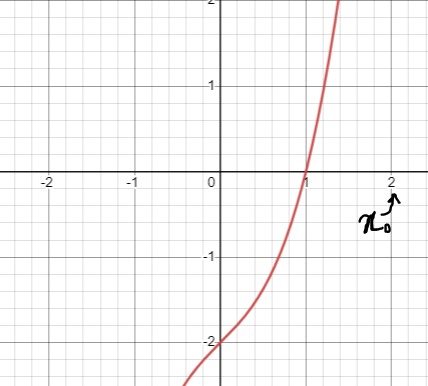

## Task 4: Plotting
In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

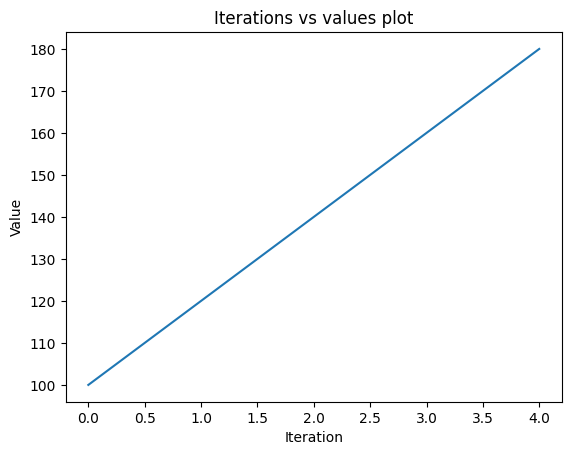

In [ ]:
iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_i)$ along the $Y$-axis.

In [ ]:
iters = np.arange(1, 6)
vals = x_values

plt.plot(iters, vals)
plt.title("Iterations vs Root Approximation")
plt.xlabel("Iteration")
plt.ylabel("Root approximation")
plt.show()

NameError: name 'x_values' is not defined

Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.